<a href="https://colab.research.google.com/github/vviia/ml-identification-of-hypertension/blob/main/FindPeak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### import library

In [ ]:
!pip install neurokit2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 5.1 MB/s 


In [ ]:
!pip install hrv-analysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyhrv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 5.2 MB/s 
     |████████████████████████████████| 230 kB 33.6 MB/s 
     |████████████████████████████████| 106 kB 67.4 MB/s 
     |████████████████████████████████| 47 kB 3.9 MB/s 
  Created wheel for spectrum: filename=spectrum-0.8.1-cp38-cp38-linux_x86_64.whl size=235151 sha256=d83093cd3ad9e9a8a4e27d5f6a2021055b96d6ace005e9885df666121b70d837
  Stored in directory: /root/.cache/pip/wheels/8f/2c/22/4a514eb971c5f4693506f55ff7ff43fd501495322cb0b92464
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=6530395f0abb46e61944513ad9c45efd29bc39d883585111ec8ba34eb63b90a7
  Stored in directory: /root/.cache/pip/wheels/e2/47/9f/de01f291cfde341b33383bcf1292b17d64c700d4a12b318a7d
Successfully built spectrum easydev


#### load dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


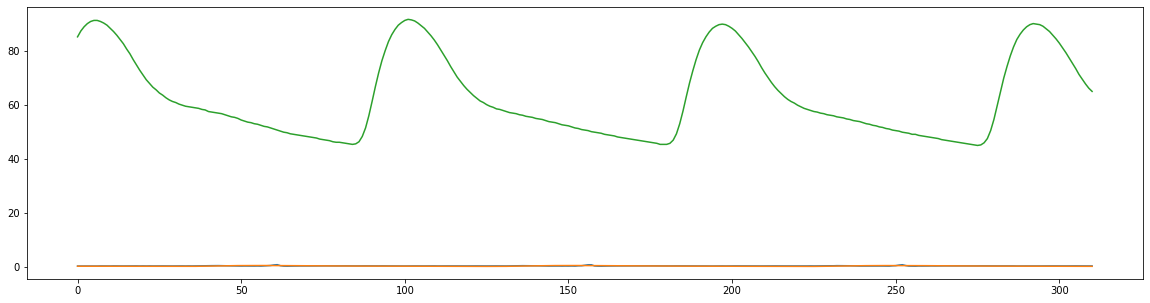

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

ppg_simulated=pd.read_csv('/content/drive/MyDrive/final-project-tesis/TESIS-INDIFFERENT/data-sampel-peak-s1870.csv', header=None)
plt.figure(figsize=(20,5))
plt.plot(ppg_simulated)
plt.show()

In [ ]:
df = ppg_simulated
df.head()

,0,1,2
0,0.449507,0.391007,85.071763
1,0.460591,0.389052,87.223003
2,0.444581,0.387097,88.787542
3,0.460591,0.385142,89.960945
4,0.449507,0.382209,90.743214


#### print df

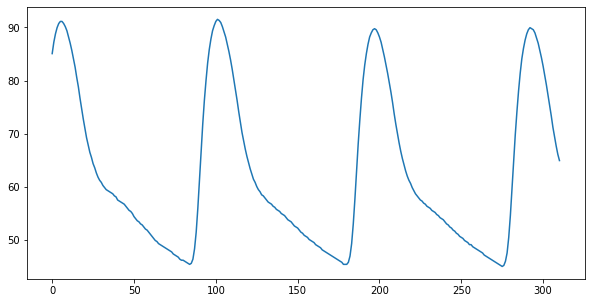

In [ ]:
df1 = df[0] #EKG
ppg = df[1] #PPG
df3 = df[2] #BP

plt.figure(figsize=(10, 5))
plt.plot(df3)

#### find peak

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy import signal
from scipy.integrate import trapz
from scipy.interpolate import interp1d
import seaborn as sns

In [ ]:
# FIND PEAK BP
long = len(ppg)
long
long1 = long-1
long1

# x and y definition
x= np.linspace(0,long1,long) 
y= ppg
#find peak
peaks = find_peaks(y, height=0.5, threshold=0, distance=10)
height = peaks[1]['peak_heights']
peak_post= x[peaks[0]]
#print("posisi titik puncak :", peak_post)
#print(height)
#rata-rata puncak
average = sum(height)/len(height)
print("rata-rata siastol:", average)
#menemukan nilai minimum
y2=y*-1
minima=find_peaks(y2)
min_pos=x[minima[0]]
min_height=y2[minima[0]]
averages = sum(min_height)*-1/len(min_height)
print("rata-rata diastol : ", averages)

# distance
peak_coordinate=peak_post
data1=peak_coordinate[1:]
#data titik ke1-39
data2=peak_coordinate[:-1]
#jarak antar puncak (pengurangan array)
distance= data1-data2
#mencari rata-rata jarak
total = np.sum(distance)
totaldistance = total
average= totaldistance/len(distance)


rata-rata siastol: 0.65200391
rata-rata diastol :  0.31899641600000006


#### ploting find peaks

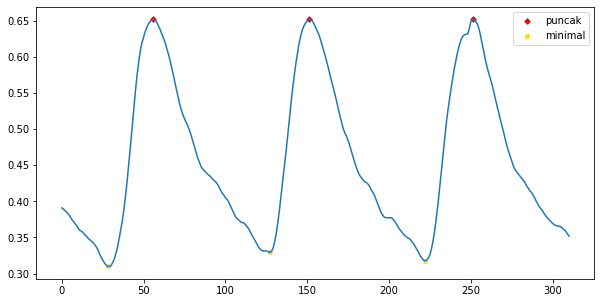

In [ ]:
#plotting
fig = plt.figure(figsize=(10,5))
ax= fig.subplots()
ax.plot(x,y)
ax.scatter(peak_post, height, color='r', s=15, marker='D', label='puncak')
ax.scatter(min_pos, min_height*-1, color='gold', s=15, marker='X', label='minimal')
ax.legend()
# ax.grid()
plt.show() 

In [ ]:
# FIND PEAK BP
long = len(ppg)
long
long1 = long-1
long1

# x and y definition
x= np.linspace(0,long1,long) 
y= ppg
#find peak
peaks = find_peaks(y, height=0.5, threshold=0, distance=10)
height = peaks[1]['peak_heights']
peak_post= x[peaks[0]]
#print("posisi titik puncak :", peak_post)
#print(height)
#rata-rata puncak
average = sum(height)/len(height)
print("rata-rata siastol:", average)
#menemukan nilai minimum
y2=y*-1
minima=find_peaks(y2)
min_pos=x[minima[0]]
min_height=y2[minima[0]]
averages = sum(min_height)*-1/len(min_height)
print("rata-rata diastol : ", averages)

# distance
peak_coordinate=peak_post
data1=peak_coordinate[1:]
#data titik ke1-39
data2=peak_coordinate[:-1]
#jarak antar puncak (pengurangan array)
distance= data1-data2
#mencari rata-rata jarak
total = np.sum(distance)
totaldistance = total
average= totaldistance/len(distance)

#plotting
fig = plt.figure(figsize=(20,5))
ax= fig.subplots()
ax.plot(x,y)
ax.scatter(peak_post, height, color='r', s=15, marker='D', label='puncak BP')
ax.scatter(min_pos, min_height*-1, color='gold', s=15, marker='X', label='minimal')
ax.legend()
ax.grid()
plt.show() 